<a href="https://colab.research.google.com/github/AbderrahimBend/Abder/blob/master/Projet_SRLS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai.vision import *
from fastai.metrics import error_rate

In [0]:
bs = 64
# bs = 16   # uncomment this line if you run out of memory even after clicking Kernel->Restart

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
path = Path('/content/gdrive/My Drive/Colab Notebooks/asl_alphabet_train_all');
path

PosixPath('/content/gdrive/My Drive/Colab Notebooks/asl_alphabet_train_all')

In [0]:
fnames = get_image_files(path)


In [0]:
np.random.seed(2)
pat = r'(\w).+.jpg'

In [0]:
data = ImageDataBunch.from_name_re(path,fnames, pat=pat, ds_tfms=get_transforms(), size=224).normalize(imagenet_stats)

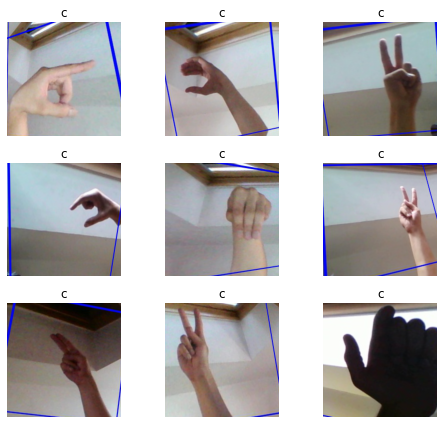

In [0]:
data.show_batch(rows=3, figsize=(7,6))


In [0]:
print(data.classes)


['c']


In [0]:
learn = cnn_learner(data, models.resnet18, metrics=accuracy)
learn.fit_one_cycle(1)